In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
fifa = pd.read_csv('data/FIFA2018.csv')
fifa.head()

,Date,Team,Opponent,Result,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,Win,5,40,13,7,3,3,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,Lose,0,60,6,0,3,3,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,Lose,0,43,8,3,3,2,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,Win,1,57,14,4,6,4,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,Lose,0,64,13,3,6,4,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


# The Facet Grid

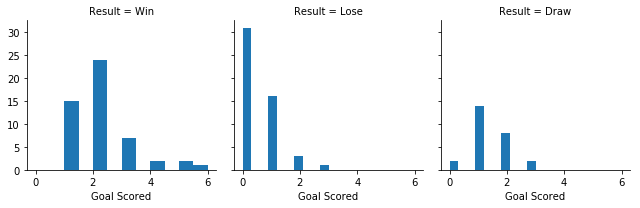

In [3]:
g = sns.FacetGrid(fifa, col='Result')
g.map(plt.hist, 'Goal Scored');

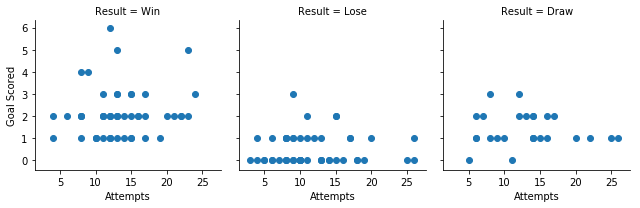

In [4]:
g = sns.FacetGrid(fifa, col='Result')
g.map(plt.scatter, 'Attempts', 'Goal Scored');

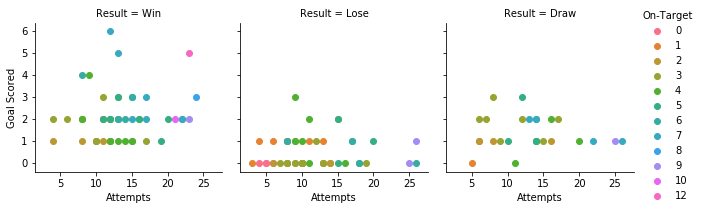

In [5]:
g = sns.FacetGrid(fifa, col='Result', hue='On-Target')
g.map(plt.scatter, 'Attempts', 'Goal Scored')
g.add_legend();

/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


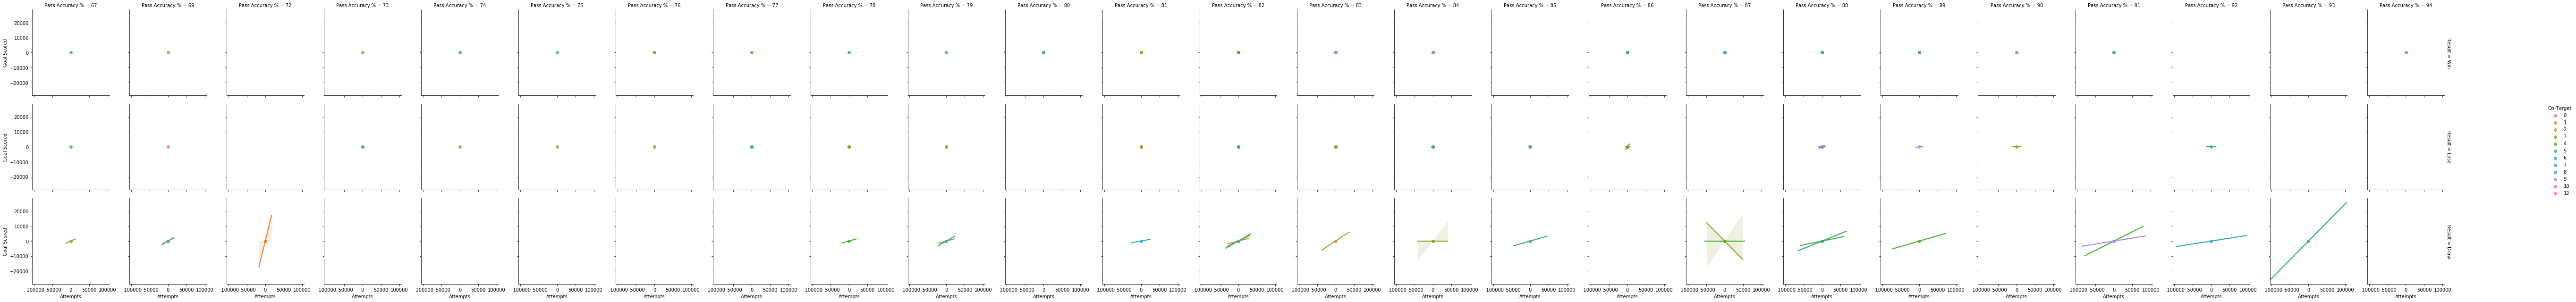

In [6]:
g = sns.FacetGrid(fifa, 
                  row='Result', 
                  col='Pass Accuracy %',
                  hue='On-Target', 
                  margin_titles=True)
g.map(sns.regplot, 'Attempts', 'Goal Scored', fit_reg=True)
g.add_legend();

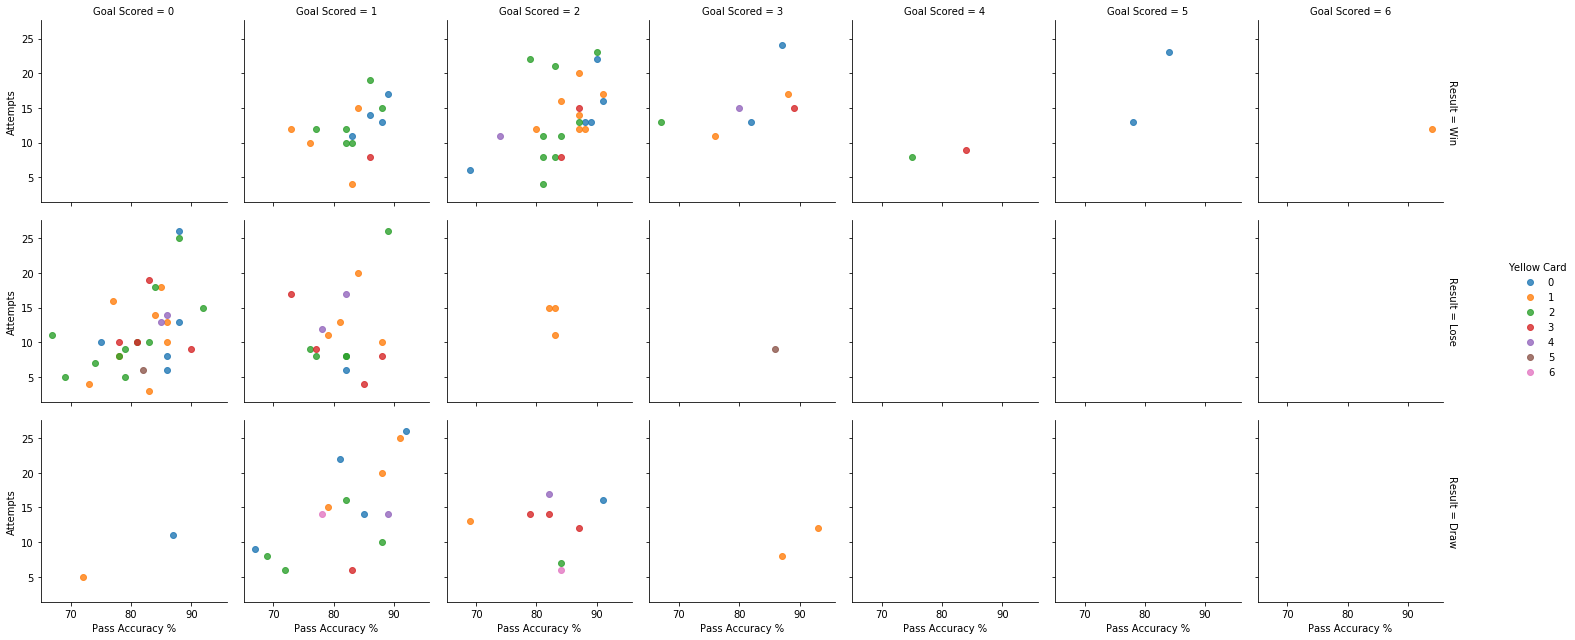

In [7]:
g = sns.FacetGrid(fifa,
                  row='Result',
                  col='Goal Scored',
                  hue='Yellow Card',
                  margin_titles=True,
                  gridspec_kws={'width_ratios': [4] * 7})
g.map(sns.regplot, 'Pass Accuracy %', 'Attempts', fit_reg=False)
g.add_legend();

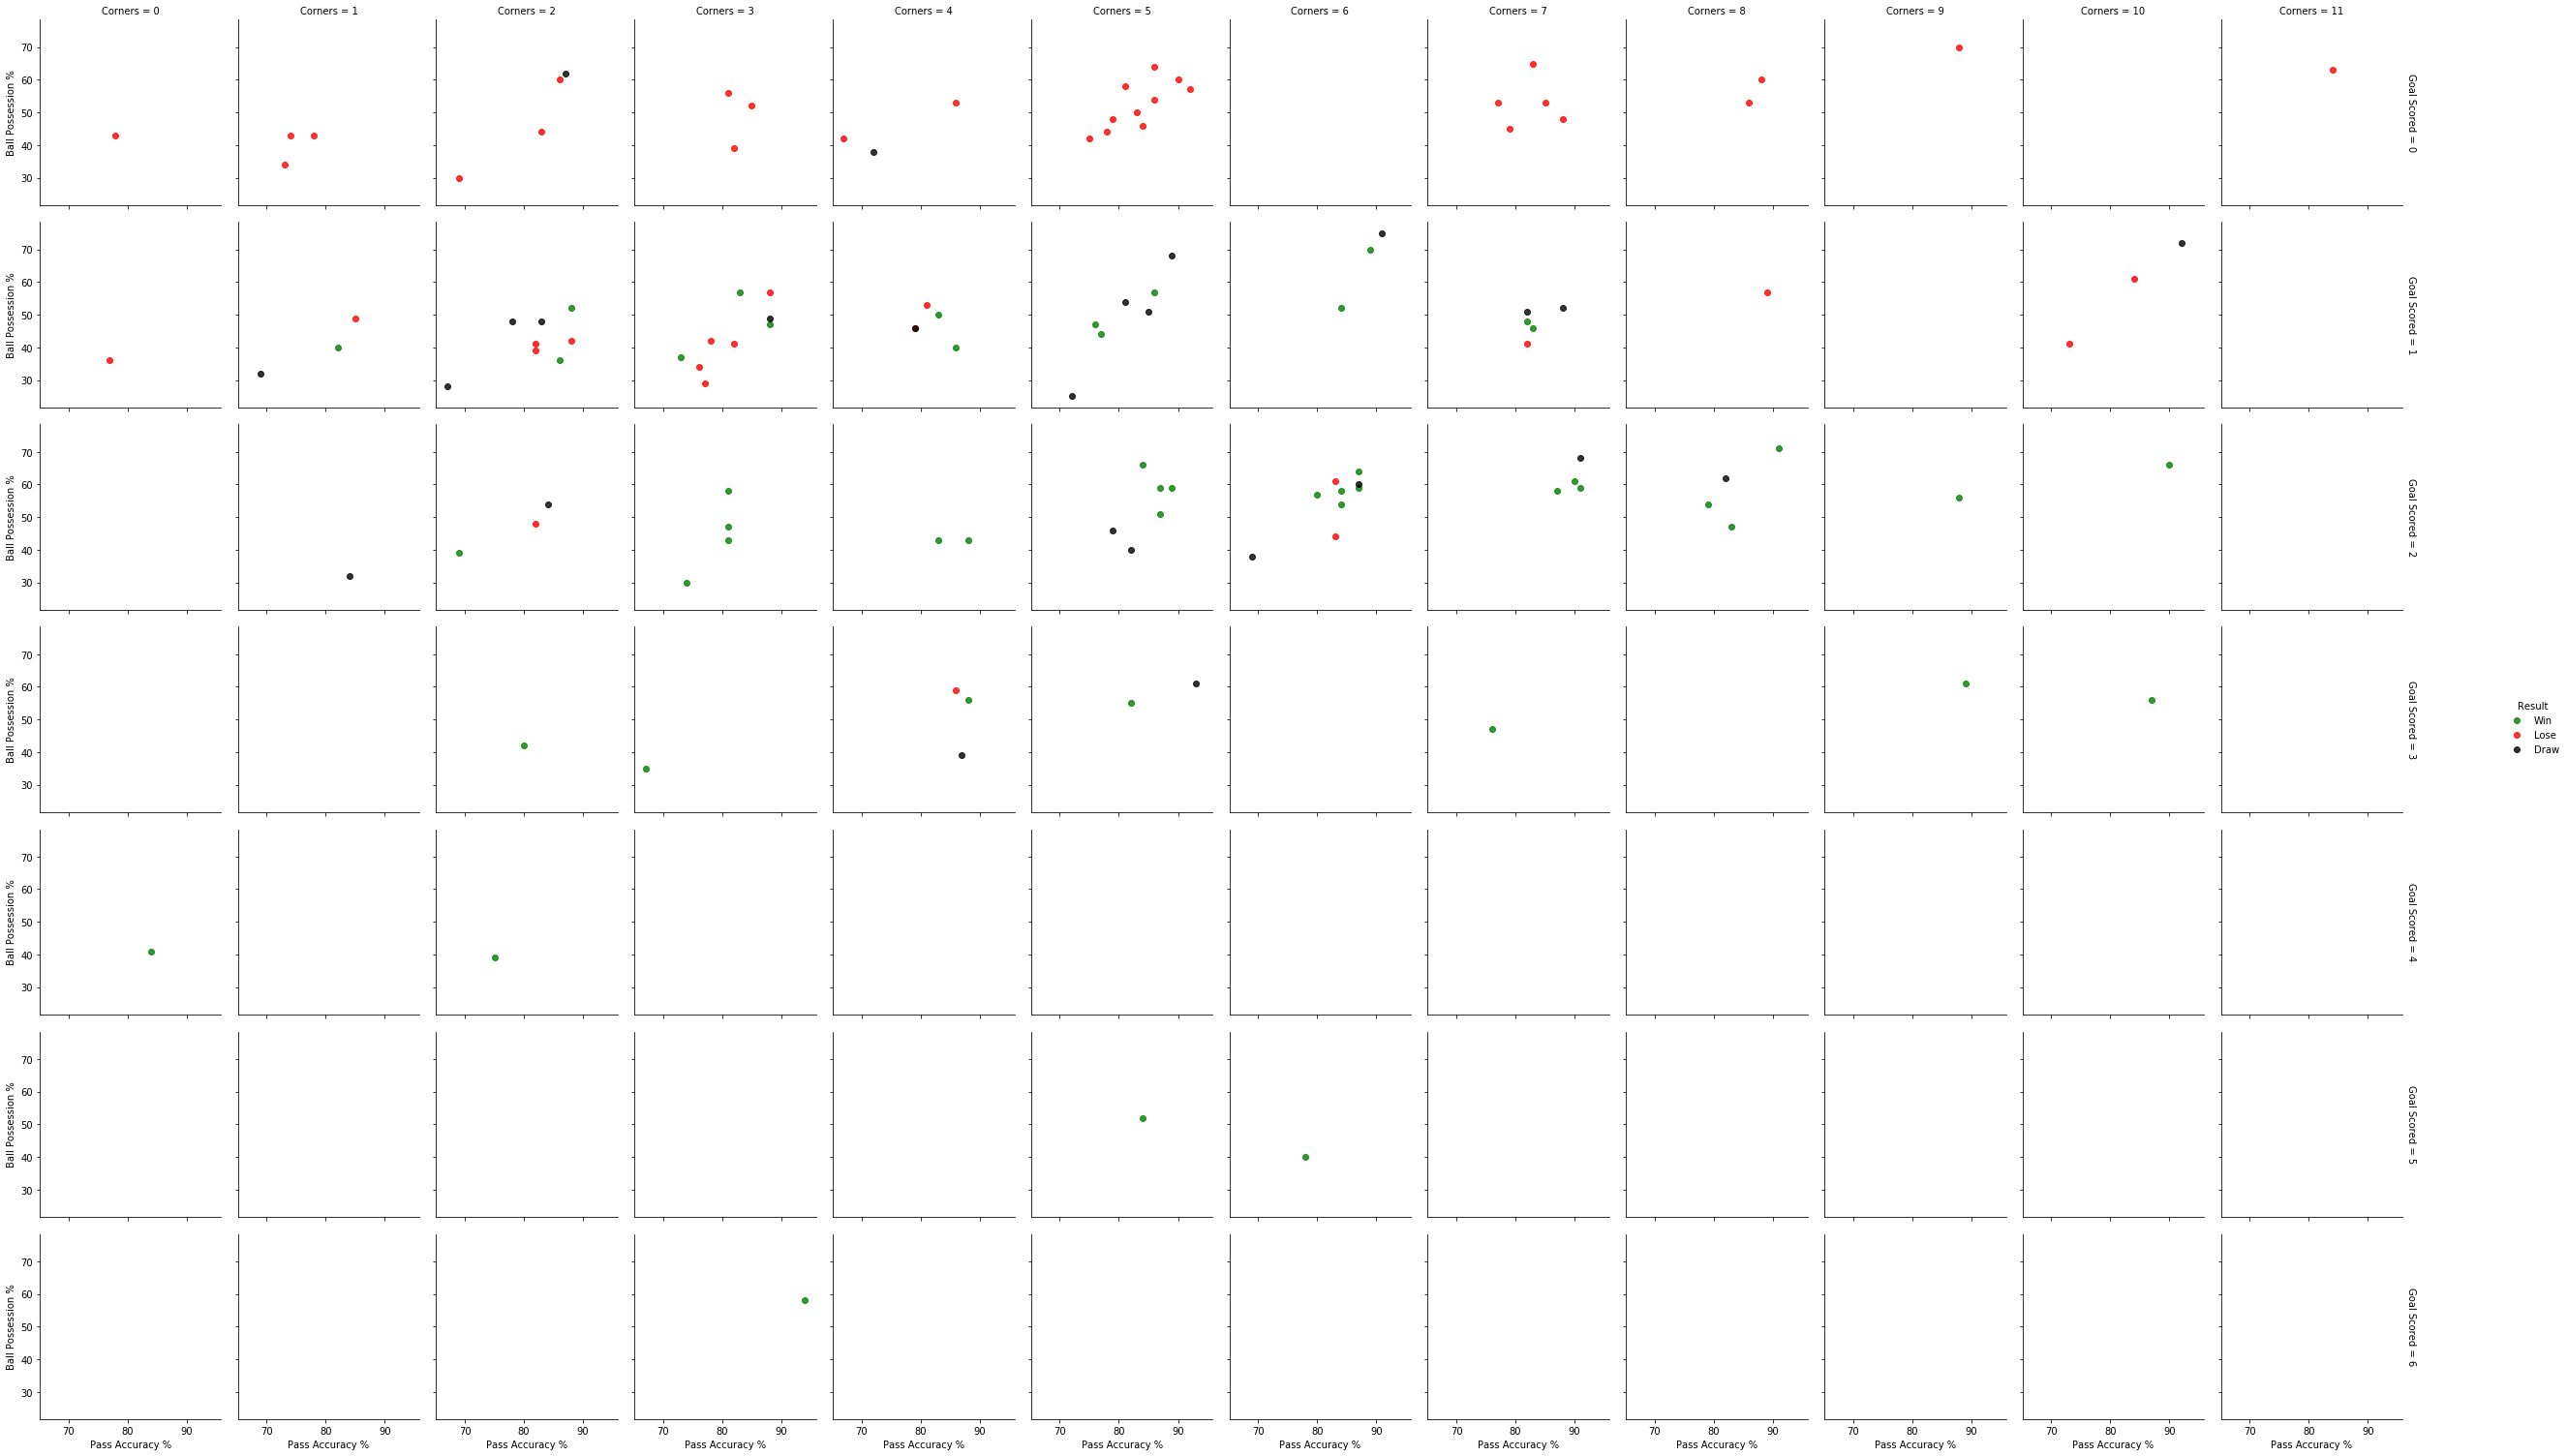

In [8]:
pal = {'Win': 'green', 'Lose': 'red', 'Draw': 'black'}
g = sns.FacetGrid(fifa,
                  row='Goal Scored',
                  col='Corners',
                  hue='Result',
                  margin_titles=True,
                  palette=pal)
g.map(sns.regplot, 'Pass Accuracy %', 'Ball Possession %', fit_reg=False)
g.add_legend();

# Customizing the Facet Grid

/usr/local/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


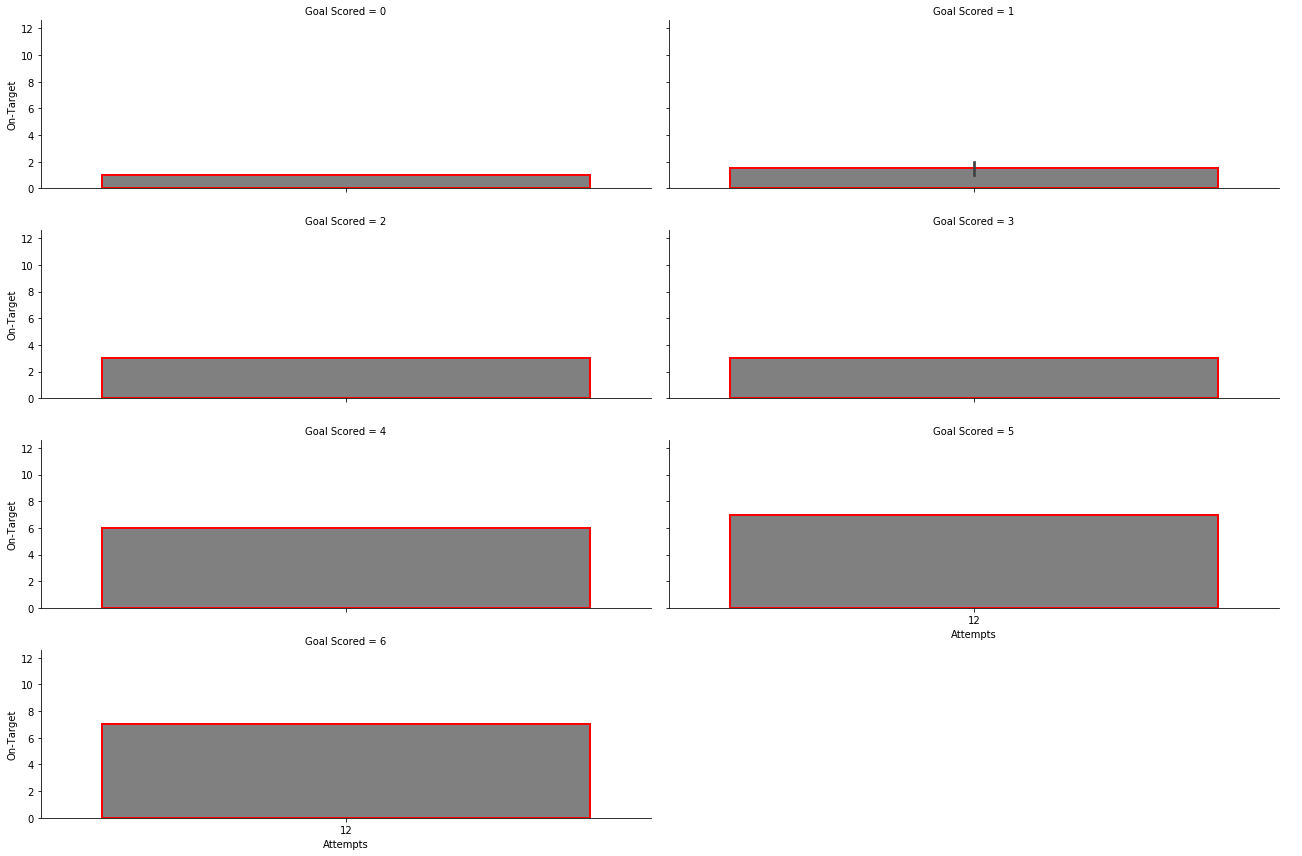

In [9]:
g = sns.FacetGrid(fifa, col='Goal Scored', col_wrap=2, aspect=3)
g.map(sns.barplot, 
      'Attempts', 
      'On-Target', 
      color='grey', 
      edgecolor='red', 
      lw=2)
g.add_legend();

/usr/local/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


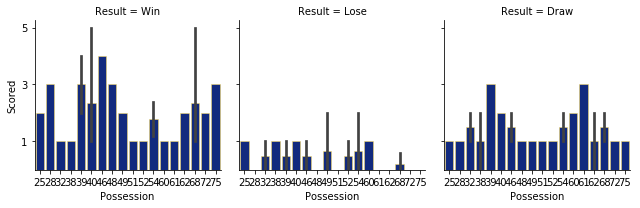

In [10]:
g = sns.FacetGrid(fifa, col='Result', col_wrap=3, aspect=1)
g.map(sns.barplot,
      'Ball Possession %',
      'Goal Scored',
      color='#002090',
      edgecolor='#FFDF5F',
      lw=0.5)
#g.set(xticks=[20, 40, 60, 80]) ???
g.set(yticks=[1, 3, 5])
g.fig.subplots_adjust(wspace=0.1, hspace=0.5)
g.set_axis_labels('Possession', 'Scored');

# The Pair Grid

In [3]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


/usr/local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


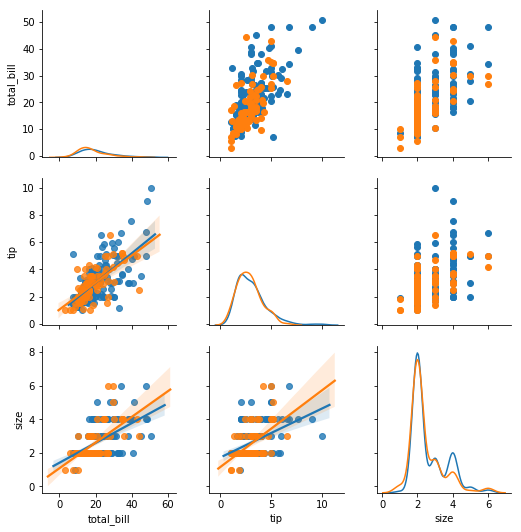

In [11]:
g = sns.PairGrid(tips, vars=['total_bill', 'tip', 'size'], hue='sex')
#g.map(plt.scatter)
g.map_upper(plt.scatter)
g.map_lower(sns.regplot)
g.map_diag(sns.kdeplot);

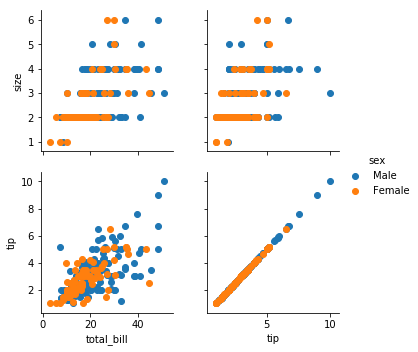

In [12]:
g = sns.PairGrid(
    tips, x_vars=['total_bill', 'tip'], y_vars=['size', 'tip'], hue='sex')
g.map(plt.scatter)
g.add_legend();